In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [42]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [43]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

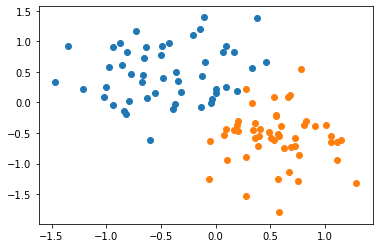

In [44]:
scatter_plot()

In [45]:
class Model(nn.Module) :
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

In [46]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [47]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
    return w1.item(),w2.item(), b1.item()

In [48]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2, 2])
    x2 = (w1*x1 + b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()

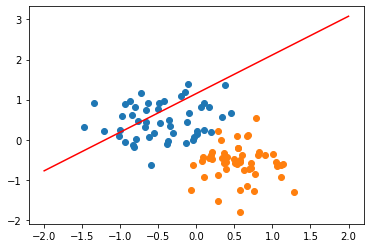

In [49]:
plot_fit('Initial Model')

In [50]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [51]:
epochs = 500
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i, "loss:", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:  0 loss: 0.6185115575790405
epoch:  1 loss: 0.6174639463424683
epoch:  2 loss: 0.6164201498031616
epoch:  3 loss: 0.6153794527053833
epoch:  4 loss: 0.614342451095581
epoch:  5 loss: 0.6133086681365967
epoch:  6 loss: 0.6122783422470093
epoch:  7 loss: 0.6112515330314636
epoch:  8 loss: 0.6102280616760254
epoch:  9 loss: 0.6092080473899841
epoch:  10 loss: 0.6081910729408264
epoch:  11 loss: 0.6071775555610657
epoch:  12 loss: 0.606167733669281
epoch:  13 loss: 0.6051608920097351
epoch:  14 loss: 0.604157567024231
epoch:  15 loss: 0.6031574606895447
epoch:  16 loss: 0.602160632610321
epoch:  17 loss: 0.6011670827865601
epoch:  18 loss: 0.6001767516136169
epoch:  19 loss: 0.599189817905426
epoch:  20 loss: 0.5982059240341187
epoch:  21 loss: 0.5972254276275635
epoch:  22 loss: 0.5962479114532471
epoch:  23 loss: 0.5952739119529724
epoch:  24 loss: 0.5943028926849365
epoch:  25 loss: 0.5933352112770081
epoch:  26 loss: 0.5923705101013184
epoch:  27 loss: 0.5914090275764465
epoch: 

epoch:  358 loss: 0.3908523619174957
epoch:  359 loss: 0.3904797434806824
epoch:  360 loss: 0.3901081383228302
epoch:  361 loss: 0.3897373676300049
epoch:  362 loss: 0.38936755061149597
epoch:  363 loss: 0.38899853825569153
epoch:  364 loss: 0.3886304199695587
epoch:  365 loss: 0.38826319575309753
epoch:  366 loss: 0.38789692521095276
epoch:  367 loss: 0.38753142952919006
epoch:  368 loss: 0.3871667981147766
epoch:  369 loss: 0.38680294156074524
epoch:  370 loss: 0.386440247297287
epoch:  371 loss: 0.3860781490802765
epoch:  372 loss: 0.38571697473526
epoch:  373 loss: 0.38535675406455994
epoch:  374 loss: 0.3849973678588867
epoch:  375 loss: 0.3846386969089508
epoch:  376 loss: 0.3842810094356537
epoch:  377 loss: 0.38392409682273865
epoch:  378 loss: 0.3835679590702057
epoch:  379 loss: 0.3832126259803772
epoch:  380 loss: 0.38285839557647705
epoch:  381 loss: 0.38250482082366943
epoch:  382 loss: 0.3821520507335663
epoch:  383 loss: 0.3818000853061676
epoch:  384 loss: 0.38144892454

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel